<a href="https://colab.research.google.com/github/sasikarur/ML_Projects/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importing necessary dependencies


In [ ]:
!pip install seaborn==0.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('Customer_Conversion_Prediction.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 45211 rows and 11 columns.


# 2.Checking and Handling Missing Values

Checking for missing values

In [ ]:
# looking for the amount of null data in the pandas dataframe
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# 3.Data Type Correction

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

# 4.Analyze Categorical Columns

In [ ]:
# for column "job"
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job'] = df['job'].replace({'admin.':'admin'})

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
# for column "marital"
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
# for column "education_qual"
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
# for column "call_type"
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
# for column "mon"
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df['mon'] = df['mon'].replace({'jul':'july','jun':'june','aug':'auguest','nov':'november','apr':'april','feb':'february','jan':'january','oct':'october','sep':'september','mar':'march','dec':'december'})

In [ ]:
df['mon'].value_counts()

may          13766
july          6895
auguest       6247
june          5341
november      3970
april         2932
february      2649
january       1403
october        738
september      579
march          477
december       214
Name: mon, dtype: int64

In [ ]:
# for column "prev_outcome"
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

# 5.Data Visualization.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

## 5.1.Distribution of Future Plot

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

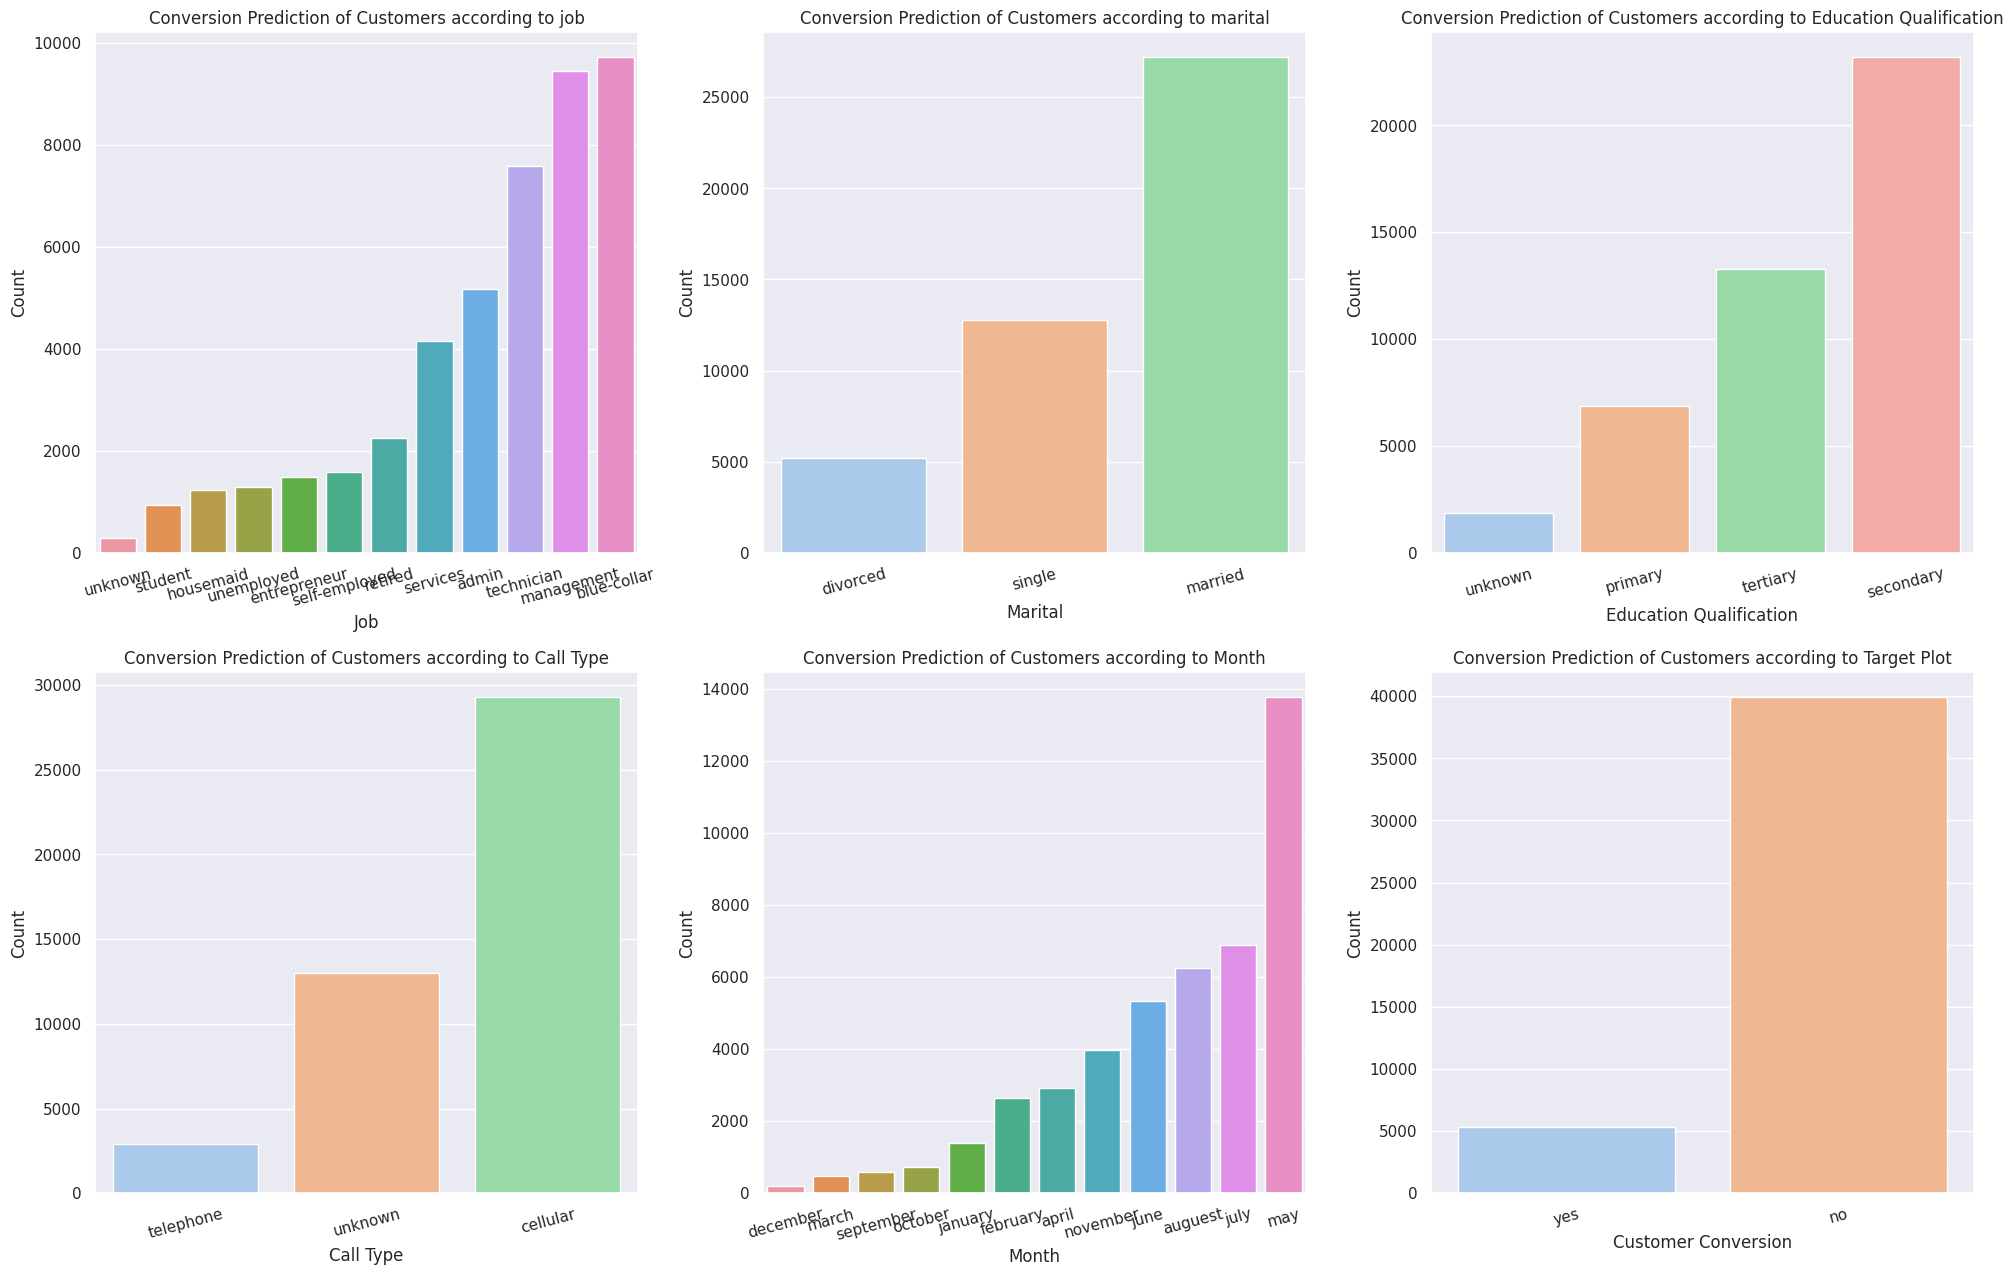

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to job')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Education Qualification')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to Education Qualification')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to Call Type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to Month')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Prev outcome')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to Prev outcome')


plt.subplot(436)
sns.countplot(df['y'],order=df['y'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Customer Conversion')
plt.ylabel('Count')
plt.title('Conversion Prediction of Customers according to Target Plot')

plt.tight_layout()

## 5.2.Future Vs Target Plot

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

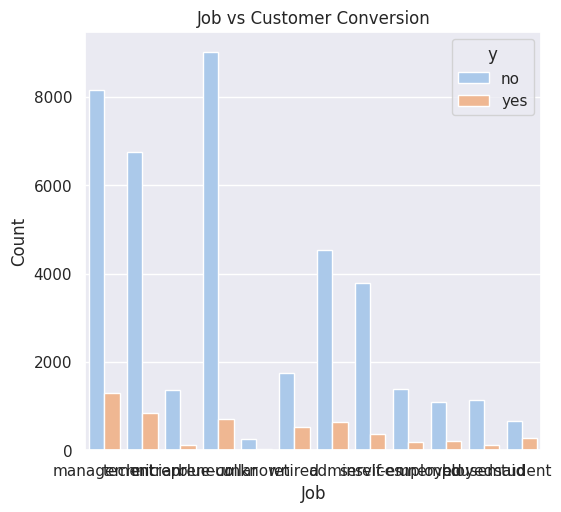

In [ ]:
plt.figure(figsize=(20, 25))
plt.subplot(435)
sns.countplot(data=df, x='job', hue='y')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job vs Customer Conversion')
plt.show()

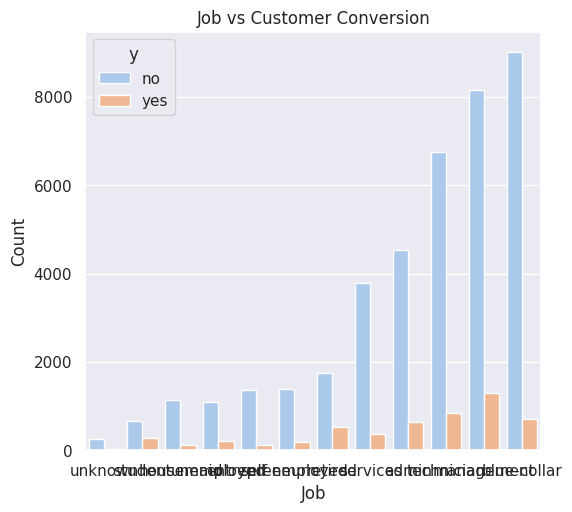

In [ ]:
count_y_by_job = df.groupby('job')['y'].count().reset_index()
ordered_job_by_count = count_y_by_job.sort_values('y')['job']

plt.figure(figsize=(20, 25))
plt.subplot(431)
sns.countplot(data=df, x='job', hue='y', order=ordered_job_by_count)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job vs Customer Conversion')
plt.show()

In [ ]:
#orders for all the barplots in ascending order

#Job Variable
count_y_by_job = df.groupby('job')['y'].count().reset_index()
ordered_job_by_count = count_y_by_job.sort_values('y')['job']

#marital variable
count_y_by_marital = df.groupby('marital')['y'].count().reset_index()
ordered_marital_by_count = count_y_by_marital.sort_values('y')['marital']

#education_qual Variable
count_y_by_education_qual = df.groupby('education_qual')['y'].count().reset_index()
ordered_education_qual_by_count = count_y_by_education_qual.sort_values('y')['education_qual']

#call_type Variable
count_y_by_call_type = df.groupby('call_type')['y'].count().reset_index()
ordered_call_type_by_count = count_y_by_call_type.sort_values('y')['call_type']

#month Variable
count_y_by_month = df.groupby('mon')['y'].count().reset_index()
ordered_month_by_count = count_y_by_month.sort_values('y')['mon']

#prev_outcome Variable
count_y_by_prev_outcome = df.groupby('prev_outcome')['y'].count().reset_index()
ordered_prev_outcome_by_count = count_y_by_prev_outcome.sort_values('y')['prev_outcome']

In [ ]:
#categorical Variable

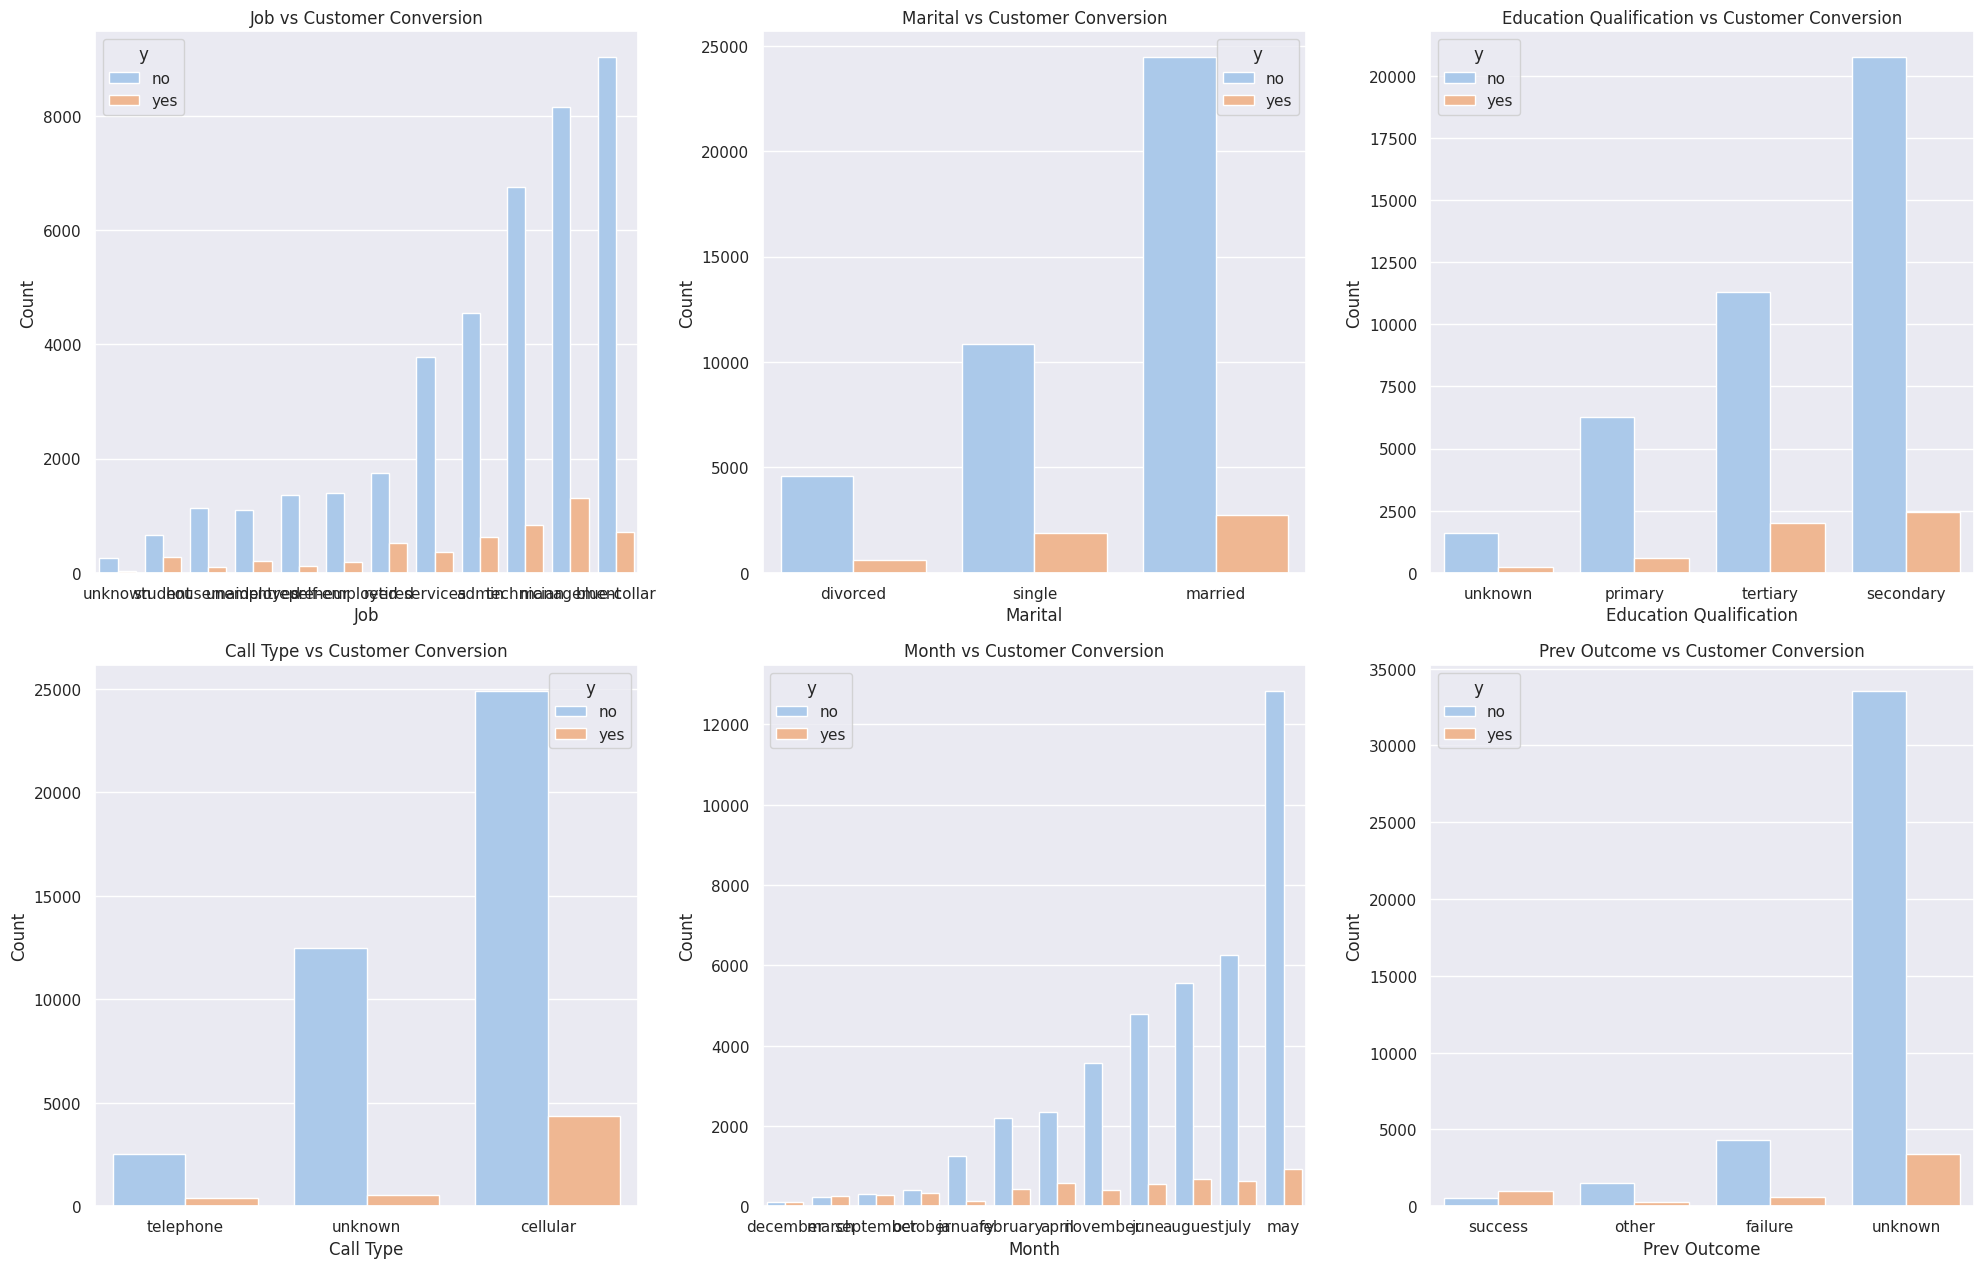

In [ ]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.countplot(data=df, x='job', hue='y', order=ordered_job_by_count)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job vs Customer Conversion')

plt.subplot(432)
sns.countplot(data=df, x='marital', hue='y', order=ordered_marital_by_count)
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Marital vs Customer Conversion')

plt.subplot(433)
sns.countplot(data=df, x='education_qual', hue='y', order=ordered_education_qual_by_count)
plt.xlabel('Education Qualification')
plt.ylabel('Count')
plt.title('Education Qualification vs Customer Conversion')

plt.subplot(434)
sns.countplot(data=df, x='call_type', hue='y', order=ordered_call_type_by_count)
plt.xlabel('Call Type')
plt.ylabel('Count')
plt.title('Call Type vs Customer Conversion')

plt.subplot(435)
sns.countplot(data=df, x='mon', hue='y', order=ordered_month_by_count)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month vs Customer Conversion')

plt.subplot(436)
sns.countplot(data=df, x='prev_outcome', hue='y', order=ordered_prev_outcome_by_count)
plt.xlabel('Prev Outcome')
plt.ylabel('Count')
plt.title('Prev Outcome vs Customer Conversion')

plt.tight_layout()

In [ ]:
#continuous variable

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
def group(x):

    if x <18:
        status=  "< 18"
    elif x<24:
        status = "19-24"
    elif x<34:
        status = "25-34"
    elif x<44:
        status = "35-44"
    elif x<54:
        status = "45-54"
    else:
        status = "55 +"

    return status

In [ ]:
df['Age_group'] = df['age'].apply(group)

In [ ]:
import pandas as pd
import plotly.express as px

def table(df, row, column, title, xaxis_title, yaxis_title):
    def bivariate_table(df, row, column):
        table = df.groupby([row, column]).size().reset_index()
        table['percentage'] = df.groupby([row, column]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values.round(1)
        table.columns = [row, column, 'Counts', 'Percentage']
        table['Percentage'] = table['Percentage'].astype(str) + '%'
        return table

    table = bivariate_table(df, row, column)

    fig = px.bar(table, x=row, y='Counts', color=column, barmode='stack', text=table['Percentage'])
    fig.update_layout(title=title, xaxis_title=xaxis_title, yaxis_title=yaxis_title, width=800, height=600)

    fig.show()

    return table

In [ ]:
table(df,'Age_group','y','Age vs Customer Conversion', 'age', 'Pecentage %')

<ipython-input-32-4215a39c0ed2>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  table['percentage'] = df.groupby([row, column]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values.round(1)


,Age_group,y,Counts,Percentage
0,19-24,no,368,72.6%
1,19-24,yes,139,27.4%
2,25-34,no,10931,86.9%
3,25-34,yes,1643,13.1%
4,35-44,no,13815,90.2%
5,35-44,yes,1509,9.8%
6,45-54,no,9351,90.9%
7,45-54,yes,932,9.1%
8,55 +,no,5451,83.6%
9,55 +,yes,1066,16.4%


In [ ]:
def day_group(day_D):
    if day_D <= 5:
        return "<5 Days"
    elif day_D <= 10:
        return "6-10 Days"
    elif day_D <= 15:
        return "11-15 Days"
    elif day_D <= 20:
        return "16-20 Days"
    elif day_D <= 25:
        return "21-25 Days"
    else:
        return "25 + Days"

df['Day_Group'] = df['day'].apply(day_group)
df['Day_Group'] = pd.Categorical(df['Day_Group'], categories=['<5 Days', '6-10 Days', '11-15 Days', '16-20 Days', '21-25 Days', '25 + Days'], ordered=True)

In [ ]:
table(df,'Day_Group','y','Day vs Customer Conversion', 'Day', 'Pecentage %')

<ipython-input-32-4215a39c0ed2>:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,Day_Group,y,Counts,Percentage
0,<5 Days,no,5153,85.2%
1,<5 Days,yes,895,14.8%
2,6-10 Days,no,6834,89.1%
3,6-10 Days,yes,839,10.9%
4,11-15 Days,no,7104,86.4%
5,11-15 Days,yes,1114,13.6%
6,16-20 Days,no,9260,91.1%
7,16-20 Days,yes,910,8.9%
8,21-25 Days,no,4481,86.9%
9,21-25 Days,yes,676,13.1%


In [ ]:
def dur_group(dur):
    if dur <= 700:  # 700 seconds = 11 minutes 40 seconds
        return "11-23 minutes"
    elif dur <= 1400:  # 1400 seconds = 23 minutes 20 seconds
        return "23-40 minutes"
    elif dur <= 2100:  # 2100 seconds = 35 minutes
        return "40-60 minutes"
    elif dur <= 3600:  # 3600 seconds = 60 minutes (1 hour)
        return "1-2 hours"
    else:
        return "Over 2 hours"

df['Duration_Group'] = df['dur'].apply(dur_group)
df['Duration_Group'] = pd.Categorical(df['Duration_Group'],
                                     categories=['11-23 minutes', '23-40 minutes', '40-60 minutes', '1-2 hours', 'Over 2 hours'],
                                     ordered=True)

In [ ]:
table(df,'Duration_Group','y','Duration of Call vs Customer Conversion', 'Duration', 'Pecentage %')

<ipython-input-32-4215a39c0ed2>:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,Duration_Group,y,Counts,Percentage
0,11-23 minutes,no,38666,90.9%
1,11-23 minutes,yes,3874,9.1%
2,23-40 minutes,no,1124,47.9%
3,23-40 minutes,yes,1225,52.1%
4,40-60 minutes,no,102,37.6%
5,40-60 minutes,yes,169,62.4%
6,1-2 hours,no,22,52.4%
7,1-2 hours,yes,20,47.6%
8,Over 2 hours,no,2,66.7%
9,Over 2 hours,yes,1,33.3%


In [ ]:
def calls_group(num_calls):
    if num_calls <= 15:  # Grouping: 1-15 calls
        return "1-15 calls"
    elif num_calls <= 30:  # Grouping: 16-30 calls
        return "16-30 calls"
    elif num_calls <= 45:  # Grouping: 31-45 calls
        return "31-45 calls"
    elif num_calls <= 60:  # Grouping: 46-60 calls
        return "46-60 calls"
    else:
        return "Over 60 calls"

df['Calls_Group'] = df['num_calls'].apply(calls_group)
df['Calls_Group'] = pd.Categorical(df['Calls_Group'],
                                   categories=['1-15 calls', '16-30 calls', '31-45 calls', '46-60 calls', 'Over 60 calls'],
                                   ordered=True)


In [ ]:
table(df,'Calls_Group','y','Number of Calls vs Customer Conversion', 'Number of Calls', 'Pecentage %')

<ipython-input-32-4215a39c0ed2>:7: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,Calls_Group,y,Counts,Percentage
0,1-15 calls,no,39399,88.2%
1,1-15 calls,yes,5276,11.8%
2,16-30 calls,no,459,97.5%
3,16-30 calls,yes,12,2.5%
4,31-45 calls,no,51,98.1%
5,31-45 calls,yes,1,1.9%
6,46-60 calls,no,6,100.0%
7,46-60 calls,yes,0,0.0%
8,Over 60 calls,no,1,100.0%
9,Over 60 calls,yes,0,0.0%


## 5.3.Encoding Categorical Variables

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'Age_group', 'Day_Group',
       'Duration_Group', 'Calls_Group'],
      dtype='object')

In [ ]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

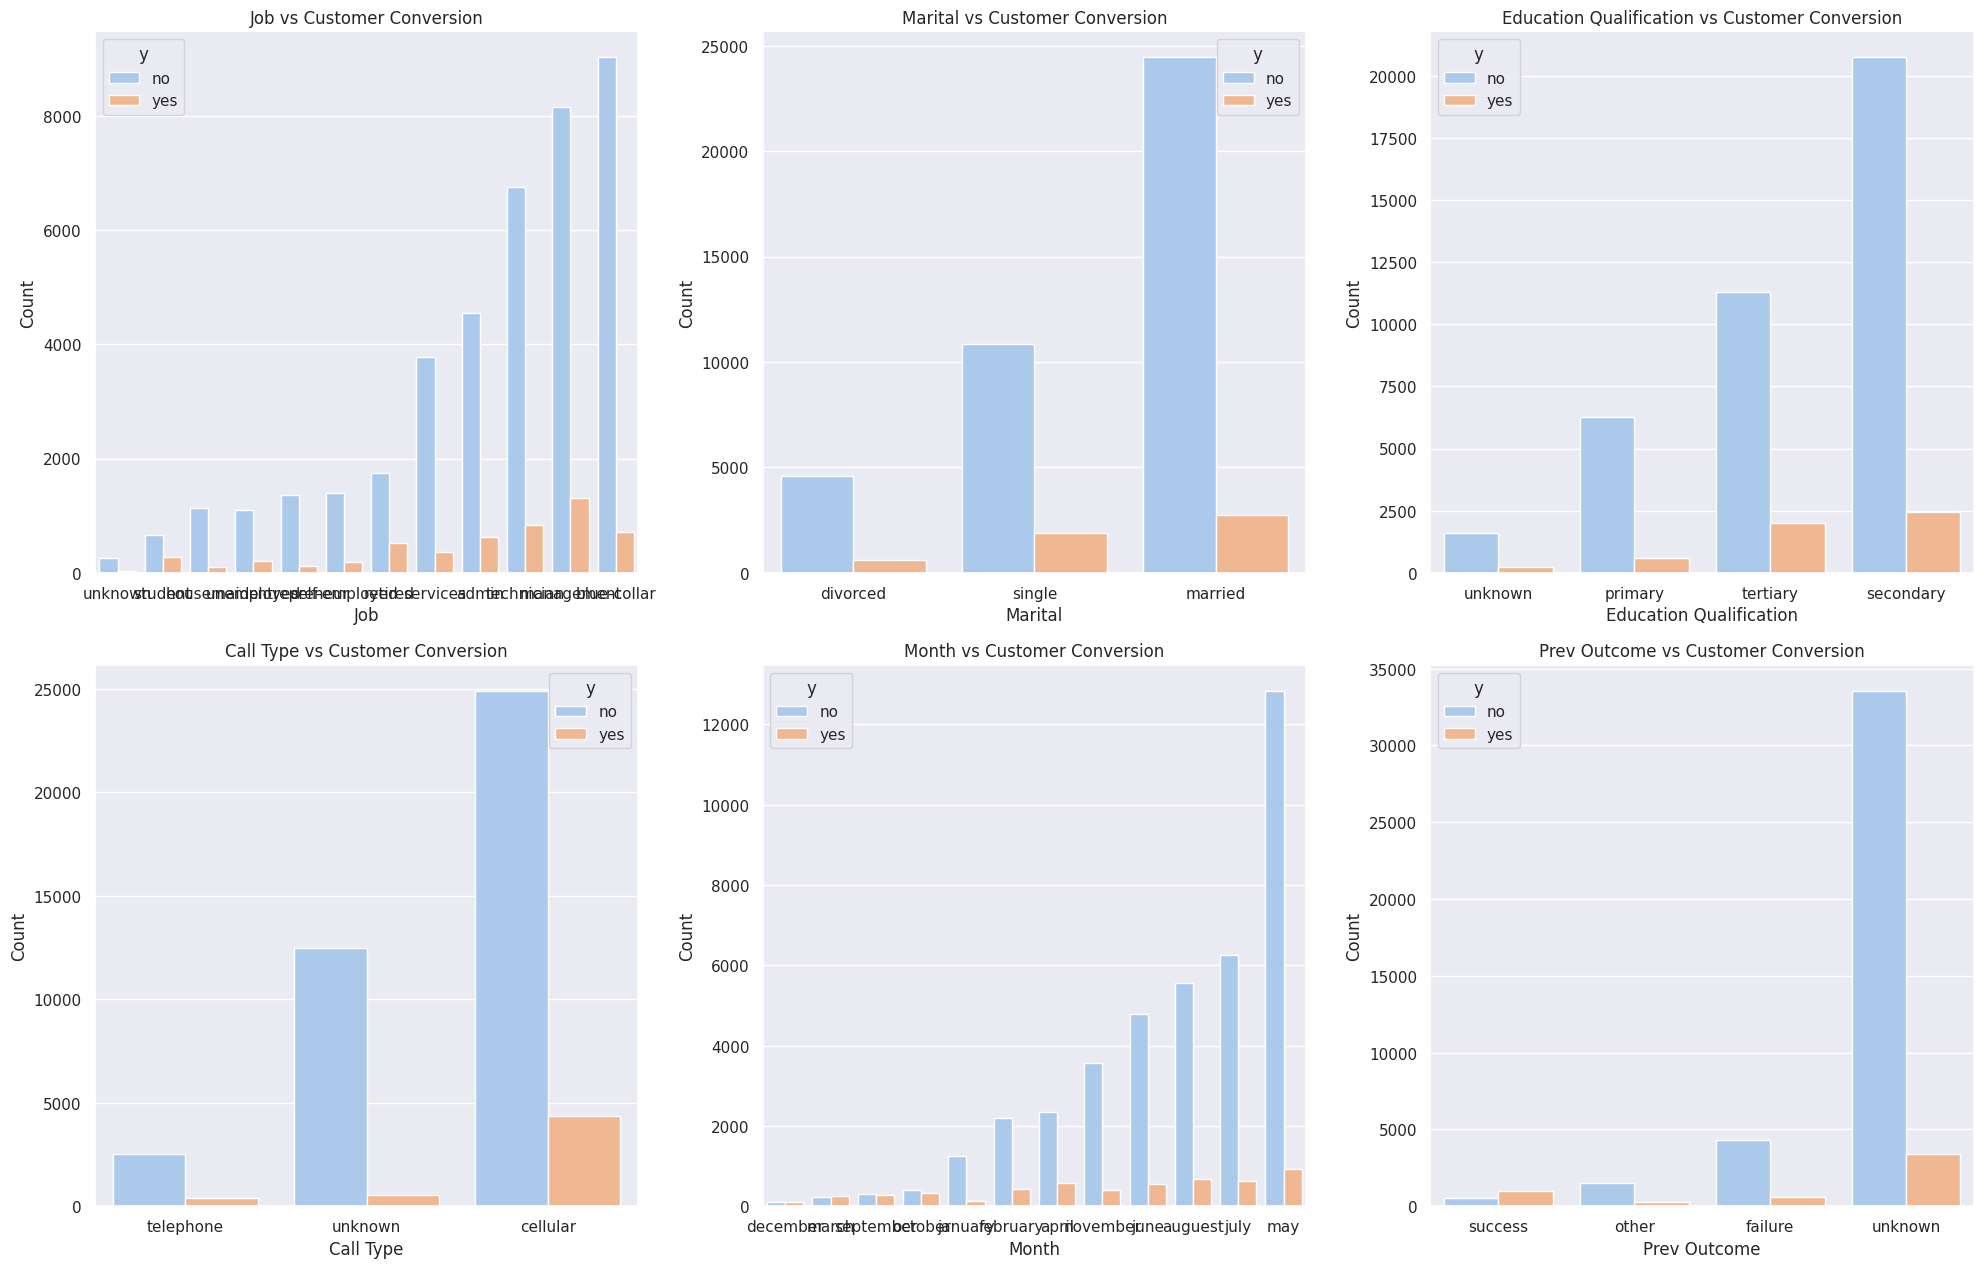

In [ ]:
df['job'] = df['job'].map({'unknown':0,'student':1,'housemaid':2,'unemployed':3,'entrepreneur':4,'self-employed':5,'retired':6,'services':7,'admin':8,'technician':9,'management':10,'blue-collar':11})
df['marital'] = df['marital'].map({'divorced':0,'single':1,'married':2})
df['education_qual'] = df['education_qual'].map({'unknown':0,'primary':1,'tertiary':2,'secondary':3})
df['call_type'] = df['call_type'].map({'telephone':0,'unknown':1,'cellular':2})
df = pd.get_dummies(df, columns = ['mon'])
##df['mon'] = df['mon'].map({'december':0,'march':1,'september':2,'october':3,'january':4,'february':5,'april':6,'november':7,'june':8,'auguest':9,'july':10,'may':11})
df = pd.get_dummies(df, columns = ['prev_outcome'])
##df['prev_outcome'] = df['prev_outcome'].map({'success':0,'other':1,'failure':2,'unknown':3})
df['y'] = df['y'].map({'yes':0,'no':1})


In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,dur,num_calls,y,Age_group,Day_Group,Duration_Group,Calls_Group,mon_april,mon_auguest,mon_december,mon_february,mon_january,mon_july,mon_june,mon_march,mon_may,mon_november,mon_october,mon_september,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,2,2,1,5,261,1,1,55 +,<5 Days,11-23 minutes,1-15 calls,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,9,1,3,1,5,151,1,1,45-54,<5 Days,11-23 minutes,1-15 calls,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,4,2,3,1,5,76,1,1,25-34,<5 Days,11-23 minutes,1-15 calls,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,11,2,0,1,5,92,1,1,45-54,<5 Days,11-23 minutes,1-15 calls,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,1,5,198,1,1,25-34,<5 Days,11-23 minutes,1-15 calls,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


# 6.Splitting the data into input data and output data

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'dur',
       'num_calls', 'y', 'Age_group', 'Day_Group', 'Duration_Group',
       'Calls_Group', 'mon_april', 'mon_auguest', 'mon_december',
       'mon_february', 'mon_january', 'mon_july', 'mon_june', 'mon_march',
       'mon_may', 'mon_november', 'mon_october', 'mon_september',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [ ]:
del df['Age_group']
del df['Day_Group']
del df['Duration_Group']
del df['Calls_Group']


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'dur',
       'num_calls', 'y', 'mon_april', 'mon_auguest', 'mon_december',
       'mon_february', 'mon_january', 'mon_july', 'mon_june', 'mon_march',
       'mon_may', 'mon_november', 'mon_october', 'mon_september',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,dur,num_calls,y,mon_april,mon_auguest,mon_december,mon_february,mon_january,mon_july,mon_june,mon_march,mon_may,mon_november,mon_october,mon_september,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,2,2,1,5,261,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,9,1,3,1,5,151,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,4,2,3,1,5,76,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,11,2,0,1,5,92,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,1,5,198,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
def split (dataframe):
  x = dataframe.drop('y',axis=1)
  y = dataframe['y']
  return x,y

In [ ]:
x,y = split(df)

In [ ]:
x

,age,job,marital,education_qual,call_type,day,dur,num_calls,mon_april,mon_auguest,mon_december,mon_february,mon_january,mon_july,mon_june,mon_march,mon_may,mon_november,mon_october,mon_september,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,10,2,2,1,5,261,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,9,1,3,1,5,151,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,4,2,3,1,5,76,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,11,2,0,1,5,92,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,1,5,198,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,2,2,2,17,977,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45207,71,6,0,1,2,17,456,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
45208,72,6,2,3,2,17,1127,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
45209,57,11,2,3,0,17,508,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    1
45210    1
Name: y, Length: 45205, dtype: int64

In [ ]:
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=70)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(36164, 24) (9041, 24) (36164,) (9041,)


In [ ]:
X_train

,age,job,marital,education_qual,call_type,day,dur,num_calls,mon_april,mon_auguest,mon_december,mon_february,mon_january,mon_july,mon_june,mon_march,mon_may,mon_november,mon_october,mon_september,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
2955,40,9,1,0,1,14,1028,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
18005,49,4,0,0,2,30,988,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
36166,45,11,2,0,2,11,306,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3657,55,9,2,3,1,16,248,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
11307,38,5,2,3,1,18,313,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21569,57,2,2,1,2,19,111,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
25922,54,3,2,2,2,19,394,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
44830,81,6,2,1,0,17,231,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
21624,56,9,2,3,2,19,35,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 7.Building Machine Learning Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report
#Logistic Regression
#Random Forest
#Gradient Boosting (XGBoost
#K-Nearest Neighbors (KNN)
#Naive Bayes

## 7.1 Logistic Regression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
predictions_lr = logistic_reg.predict(X_test)

In [ ]:
accuracy_lr = accuracy_score(y_test, predictions_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, predictions_lr))

Logistic Regression Accuracy: 0.8976883088153965
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.32      0.43      1056
           1       0.92      0.97      0.94      7985

    accuracy                           0.90      9041
   macro avg       0.77      0.65      0.68      9041
weighted avg       0.88      0.90      0.88      9041



## 7.2 Random Forest:

In [ ]:
# Train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions_rf = random_forest.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(y_test, predictions_rf))


Random Forest Accuracy: 0.9029974560336246
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.52      1056
           1       0.93      0.96      0.95      7985

    accuracy                           0.90      9041
   macro avg       0.77      0.71      0.73      9041
weighted avg       0.89      0.90      0.90      9041



## 7.3 Gradient Boosting (XGBoost):

In [ ]:
# Train the XGBoost model
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions_xgb = xgboost.predict(X_test)

In [ ]:
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print(f"\nXGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:")
print(classification_report(y_test, predictions_xgb))


XGBoost Accuracy: 0.9058732441101648
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      1056
           1       0.93      0.96      0.95      7985

    accuracy                           0.91      9041
   macro avg       0.78      0.73      0.75      9041
weighted avg       0.90      0.91      0.90      9041



## 7.4 K-Nearest Neighbors (KNN):

In [ ]:
# Train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions_knn = knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"\nK-Nearest Neighbors Accuracy: {accuracy_knn}")
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, predictions_knn))


K-Nearest Neighbors Accuracy: 0.8822032960955647
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.23      0.31      1056
           1       0.90      0.97      0.94      7985

    accuracy                           0.88      9041
   macro avg       0.70      0.60      0.62      9041
weighted avg       0.86      0.88      0.86      9041



## 7.5 Naive Bayes

In [ ]:
# Train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
predictions_nb = naive_bayes.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f"\nNaive Bayes Accuracy: {accuracy_nb}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test, predictions_nb))


Naive Bayes Accuracy: 0.8816502599269992
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.41      0.45      1056
           1       0.92      0.94      0.93      7985

    accuracy                           0.88      9041
   macro avg       0.71      0.68      0.69      9041
weighted avg       0.87      0.88      0.88      9041



## 7.6 Cross-validation scores

In [ ]:
from sklearn.model_selection import cross_val_score

models = [logistic_reg, random_forest, xgboost, knn, naive_bayes]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'K-Nearest Neighbors', 'Naive Bayes']


In [ ]:
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f"{name} - Cross Validation Score: {cv_scores.mean()} (±{cv_scores.std()})")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Logistic Regression - Cross Validation Score: 0.8970248042062924 (±0.0032651551151919615)
Random Forest - Cross Validation Score: 0.905596551498455 (±0.0031557495732729662)
XGBoost - Cross Validation Score: 0.9057348640637501 (±0.0032029883527061455)
K-Nearest Neighbors - Cross Validation Score: 0.8792172411008977 (±0.003491940735944798)
Naive Bayes - Cross Validation Score: 0.8807375936152045 (±0.003007366892880965)


# 8.F1 Score for Machine-Learning Models

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
models = [logistic_reg, random_forest, xgboost, knn, naive_bayes]
model_names = ['Logistic Regression Model', 'Random Forest Model', 'XGBoost Model', 'K-Nearest Neighbors Model', 'Naive Bayes Model']

In [ ]:
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    f1 = f1_score(y_test, predictions)
    print(f"{name} - F1 Score: {f1}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Model - F1 Score: 0.9438406896970434
Random Forest Model - F1 Score: 0.9463780592793014
XGBoost Model - F1 Score: 0.9474334424609302
K-Nearest Neighbors Model - F1 Score: 0.9355989599080848
Naive Bayes Model - F1 Score: 0.9337050805452293


# 9.Suggestion

In [ ]:
xgboost.feature_importances_

array([0.01484445, 0.01221474, 0.01210118, 0.01092021, 0.05915434,
       0.01778406, 0.05698902, 0.01287511, 0.02980603, 0.02077172,
       0.02271581, 0.03245021, 0.02717924, 0.03175417, 0.06404951,
       0.09638961, 0.0454943 , 0.03021196, 0.06405973, 0.05480836,
       0.01264754, 0.01519127, 0.22764911, 0.02793836], dtype=float32)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'dur',
       'num_calls', 'y', 'mon_april', 'mon_auguest', 'mon_december',
       'mon_february', 'mon_january', 'mon_july', 'mon_june', 'mon_march',
       'mon_may', 'mon_november', 'mon_october', 'mon_september',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],
      dtype='object')

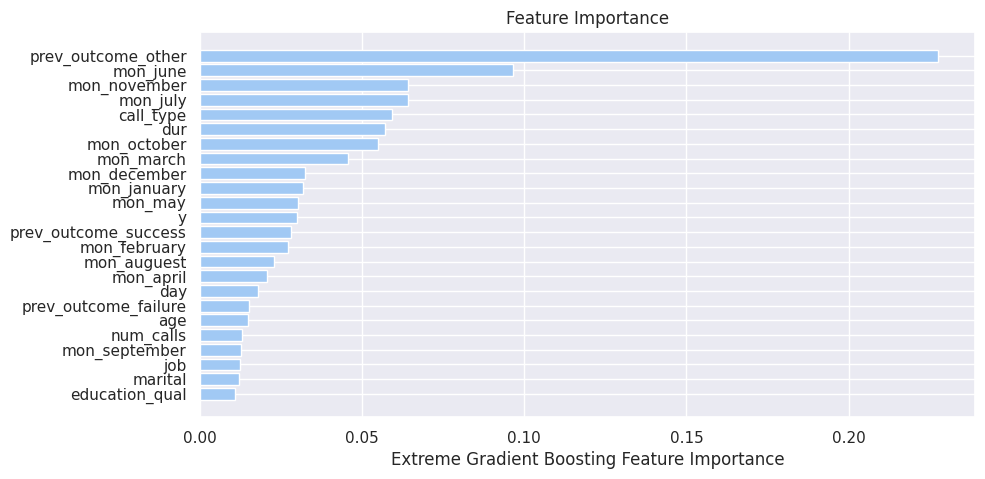

In [ ]:
sorted_idx = xgboost.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgboost.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()